### College of Computing and Informatics, Drexel University
### INFO 213: Data Science Programming II, Summer 2018
---

## Final Project Report

## Project Title: Identifying Breast Cancer

## Student(s): Raj B. Patel & Linh Mai

#### Date: 08/11/18
---

#### Abstract
---
*(Briefly summarize the project including the problem, data sets, models, and final findings.)* 

### 1. Introduction
---
*(Introduce the project, describe the objectives, and highlight the key findings.)* 

For this project, we are planning to use the Breast Cancer Wisconsin Dataset from the University of California, Irvine. According to the Susan G. Komen Foundation, 1 in 8 women will be diagnosed of invasive breast cancer. The dataset offers the opportunity to classify whether or not someone has breast cancer based on 9 true features. The objective for this project is to identify the best K-Nearest Neighbor approach to identify breast cancer with the best accuracy. Hopefully, the results of this projects can be of use to others. 

### The specific objectives will be the folllowing:
### - Adding the feature names
### - Removing the ID column values
### - Rename the Class column
### - Filling in missing data
### - Create a KNN classifier from scratch
### - Evaluate that model
### - Use the Scikit Learn package as a KNN classifier
### - Evaluate that model 

### 2. Problem Definition
---
*(Define the problem that will be solved in this data analytics project.)*

The problem to be addressed with this dataset is to identify which KNN implementation has the best accuracy, and speculate why. The stakeholders for this problem would be anyone who is interested in their health as breast cancer can happen to both men and women. Since this problem affects many people across the world, everyone can possibly benefit from this project, even if it just to increase their awareness. 

### 3. Data Sets
---
*(Describe the origin of the data sources. What is the format of the original data? How to access the data?)*

The data set used for this project is from the University of California, Irvine's Center for Machine Learning and Intelligent Systems. It was collected by Dr. William H. Wolberg from the University of Wisconsin, Clinical Sciences Center in Madison, Wisconsin. This data was collected in 1995. The format of this data is a text file. There is separate metadata for feature labels. 

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Prognostic%29

### 4. Preparation
---
*(Describe and present any code and methods for cleaning, munging, combining, normalizing, reshaping, slicing and dicing, and transforming data for analysis.)*

In [93]:
#import libraries
import numpy as np
from sklearn import preprocessing, cross_validation, neighbors
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm as cm


from math import sqrt
import warnings
from matplotlib import style
from collections import Counter
import random

In [94]:
#read & display data set
df = pd.read_csv('DataSets/breast-cancer-wisconsin.txt')
df.head()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [95]:
#switch out missing data
df = df.replace('?', df.replace(['?'], [None]))

In [96]:
#check to see the number of missing values per feature
for row in df:
    value = df[row].isnull().sum()
    print("There are", value, " missing values in column",row)

There are 0  missing values in column id
There are 0  missing values in column clump_thickness
There are 0  missing values in column unif_cell_size
There are 0  missing values in column unif_cell_shape
There are 0  missing values in column marg_adhesion
There are 0  missing values in column single_epith_cell_size
There are 16  missing values in column bare_nuclei
There are 0  missing values in column bland_chrom
There are 0  missing values in column norm_nucleoli
There are 0  missing values in column mitoses
There are 0  missing values in column class


In [97]:
#Drop null values
df = df.dropna()

In [98]:
#ID column is of no help
df.drop(['id'], 1, inplace = True)

### 5. Exploration and Visualization
---
*(Describe and present any code and methods for exploring and visualizing the data by analyzing its statistics and correlations between different features.)*

### 6. Modeling and Evaluation
---
*(Describe and present the predictive models built on the data and evaluate the performance of the models for solving the problem)*

## Using Scikit Learn

In [90]:
#X = training data
X = np.array(df.drop(['class'],1))
#y = testing data
y = np.array(df['class'])

In [91]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size = 0.4)

In [92]:

clf = neighbors.KNeighborsClassifier(n_neighbors = 5)

In [43]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [44]:
accuracy = clf.score(X_test, y_test)

In [45]:
print(accuracy)

0.9598540145985401


In [46]:
#sample test - must be a list of lists
example_measures = np.array([[4,2,1,1,1,2,3,2,1], [8,6,4,3,1,5,3,4,2]])

#1st arg in reshape is for number of test samples
example_measures = example_measures.reshape(len(example_measures),-1)

In [47]:
prediction = clf.predict(example_measures)

In [48]:
#2 for benign, 4 for malignant
print(prediction)

[2 4]


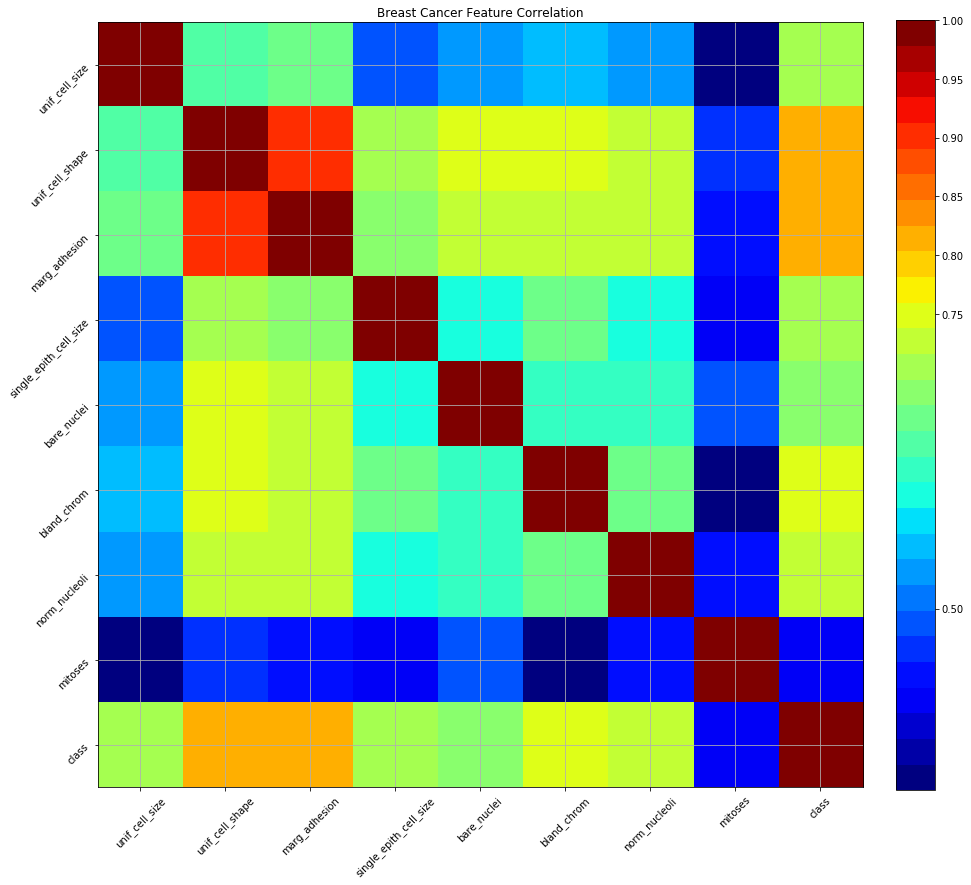

In [49]:
##from mpl_toolkits.axes_grid1 import make_axes_locatable
def correlation_matrix(df):
    fig = plt.figure(figsize = (15,30))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Breast Cancer Feature Correlation')
    labels=["clump_thickness","unif_cell_size","unif_cell_shape","marg_adhesion","single_epith_cell_size","bare_nuclei","bland_chrom","norm_nucleoli","mitoses","class"]
    ax1.set_xticklabels(labels,fontsize=10, rotation = 45)
    ax1.set_yticklabels(labels,fontsize=10, rotation = 45)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax,fraction=0.046, pad=0.04, ticks=[0,.25,.5,.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(df)

## Using KNN Made From Scratch

In [279]:
def k_nearest_neighbors_euclidean(predict,data, k):
    if len(predict) >= k:
        warnings.warn("K is set to a value less than total voting groups!")
        
    distances = []
    for group in predict:
        for features in predict[group]:
            euclidean_distance = np.linalg.norm(np.array(features) - np.array(data))
            distances.append([euclidean_distance, group])
            
    votes =  [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k
    return vote_result, confidence

In [280]:
from scipy.spatial import distance
def k_nearest_neighbors_manhattan(predict,data, k):
    if len(predict) >= k:
        warnings.warn("K is set to a value less than total voting groups!")
        
    distances = []
    for group in predict:
        for features in predict[group]:
            calculated_distance = distance.cityblock(features, data)
            distances.append([calculated_distance, group])
            
    votes =  [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k
    return vote_result, confidence

In [281]:
from scipy.spatial import distance
def k_nearest_neighbors_minkowski(predict,data, k):
    if len(predict) >= k:
        warnings.warn("K is set to a value less than total voting groups!")
        
    distances = []
    for group in predict:
        for features in predict[group]:
            calculated_distance = distance.minkowski(features, data)
            distances.append([calculated_distance, group])
            
    votes =  [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k
    return vote_result, confidence

In [282]:
#ensure all data is numeric ~ float
full_data = df.astype(float).values.tolist()

In [283]:
#shuffle data
random.shuffle(full_data)

In [284]:
test_size = 0.4

#2 in benign, 4 is malignant
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}

#first 20% of data
train_data = full_data[:-int(test_size*len(full_data))]

#last 20% of data
test_data = full_data[-int(test_size*len(full_data)):]

In [285]:
print(train_set)

{2: [], 4: []}


In [286]:
#populate above dictionaries
for i in train_data:
    train_set[i[-1]].append(i[:-1])
    
for i in test_data:
    test_set[i[-1]].append(i[:-1])    

In [287]:
correct = 0
total = 0
k_range = range(1,20)
scores1 = []
for k in k_range:
    for group in test_set:
        for data in test_set[group]:
            vote, confidence = k_nearest_neighbors_euclidean(train_set, data, k)
            if group == vote:
                correct += 1
            total +=1
    scores1.append(correct/total)

C:\Users\kpos7\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: K is set to a value less than total voting groups!
  This is separate from the ipykernel package so we can avoid doing imports until


In [288]:
max(scores1)

0.973395026026605

In [291]:
correct = 0
total = 0
k_range = range(1,20)
scores2 = []
for k in k_range:
    for group in test_set:
        for data in test_set[group]:
            vote, confidence = k_nearest_neighbors_manhattan(train_set, data, k)
            if group == vote:
                correct += 1
            total +=1
    scores2.append(correct/total)

C:\Users\kpos7\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: K is set to a value less than total voting groups!
  after removing the cwd from sys.path.


In [292]:
max(scores2)

0.971342383107089

In [294]:
correct = 0
total = 0
k_range = range(1,20)
scores3 = []
for k in k_range:
    for group in test_set:
        for data in test_set[group]:
            vote, confidence = k_nearest_neighbors_minkowski(train_set, data, k)
            if group == vote:
                correct += 1
            total +=1
    scores3.append(correct/total)

C:\Users\kpos7\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: K is set to a value less than total voting groups!
  after removing the cwd from sys.path.


In [295]:
max(scores3)

0.973395026026605

Text(0,0.5,'Testing Accuracy')

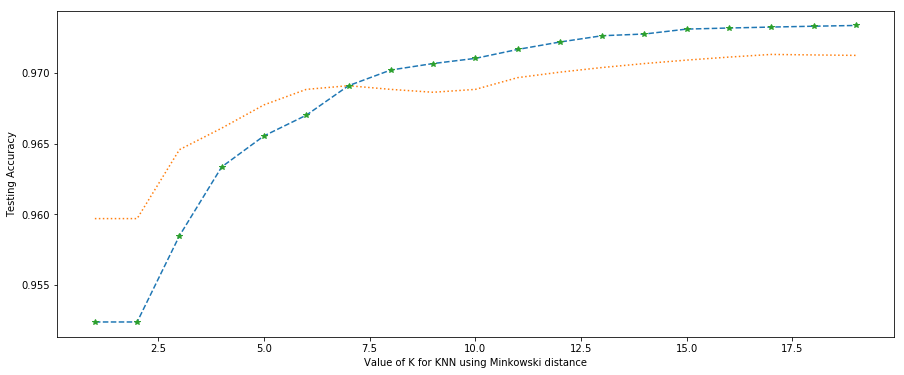

In [300]:
fig, ax = plt.subplots(figsize =(15,6))
plt.plot(k_range, scores1, '--')
plt.plot(k_range, scores2, ':')
plt.plot(k_range, scores3, '*')
plt.xlabel('Value of K for KNN using Minkowski distance')
plt.ylabel('Testing Accuracy')

### 7. Conclusion
---
*(Briefly describe what you have done and what you discovered. Discuss any shortcomings of the process and results. Propose future work. **Finally, discuss the lessons learned from doing the project**.)*

### 8. References

---
(*Use the following requirements for writing your reports. DO NOT DELETE THE CELLS BELLOW*)

# Project Requirements

This final project examines the level of knowledge the students have learned from the course. The following course outcomes will be checked against the content of the report:

Upon successful completion of this course, a student will be able to:
* Describe the key Python tools and libraries that related to a typical data analytics project. 
* Identify data science libraries, frameworks, modules, and toolkits in Python that efficiently implement the most common data science algorithms and techniques.
* Apply latest Python techniques in data acquisition, transformation and predictive analytics for data science projects.
* Discuss the underlying principles and main characteristics of the most common methods and techniques for data analytics. 
* Build data analytic and predictive models for real world data sets using existing Python libraries.

** Marking will be foucsed on both presentation and content.** 

## Written Presentation Requirements
The report will be judged on the basis of visual appearance, grammatical correctness, and quality of writing, as well as its contents. Please make sure that the text of your report is well-structured, using paragraphs, full sentences, and other features of well-written presentation.

## Technical Content:
* Is the problem well defined and described thoroughly?
* Is the size and complexity of the data set used in this project comparable to that of the example data sets used in the lectures and assignments?
* Did the report describe the charactriatics of the data?
* Did the report describe the goals of the data analysis?
* Did the analysis conduct exploratory analyses on the data?
* Did the analysis build models of the data and evaluate the performance of the models?
* Overall, what is the rating of this project?